In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats 
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression as LR
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
matplotlib.rcParams.update({'font.size': 22})

In [2]:
states = pd.read_csv('states.csv')
states.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [4]:
matplotlib.rcParams.update({'font.size': 12})
pd.plotting.scatter_matrix(states);

<IPython.core.display.Javascript object>

In [15]:
x = states[states['white'] > 50]['female_house'].to_numpy()
y = states[states['white'] > 50]['white'].to_numpy()

In [12]:
sl = ()
sl += (1,)

In [14]:
sl

(1,)

In [25]:
y.std()/x.std()

4.371632060047006

In [21]:
pearsonr(x, y)

(-0.8621736775493619, 1.75693757129518e-15)

In [22]:
b1 = y.std()/x.std() * pearsonr(x, y)[0]
b0 = y.mean() - b1*x.mean()

xx = np.linspace(min(x), max(x))
yy = b0 + b1*xx 

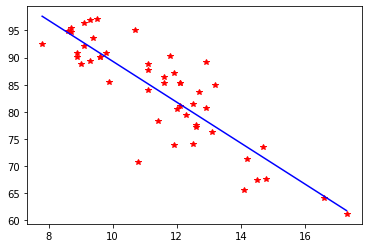

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, '*r')
ax.plot(xx, yy, '-b')

In [62]:
X, Y = states['hs_grad'].values.reshape(-1, 1), states['poverty'].values.reshape(-1, 1)
lr = LR()
lr.fit(X, Y)

x = np.linspace(X.min(), X.max()).reshape(-1, 1)
y = lr.predict(x)


In [68]:
lr.coef_, lr.intercept_

(array([[-0.62121672]]), array([64.78096577]))

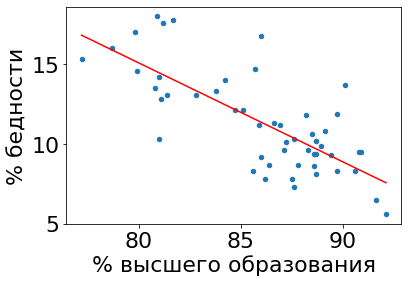

In [63]:
ax = states.plot.scatter(x='hs_grad', y='poverty')
ax.set_xlabel('% высшего образования')
ax.set_ylabel('% бедности')
ax.plot(x, y, '-r')

In [38]:
states.loc[:, ['poverty', 'hs_grad']].describe()

,poverty,hs_grad
count,51.000000,51.000000
mean,11.349020,86.011765
std,3.099185,3.725998
min,5.600000,77.200000
25%,9.250000,83.300000
50%,10.600000,86.900000
75%,13.400000,88.700000
max,18.000000,92.100000


In [76]:
result = stats.linregress(states['hs_grad'], 
                                                                               states['poverty'])

In [83]:
result.slope, result.intercept, result.pvalue, result.rvalue, result.stderr, result.intercept_stderr

(-0.6212167177940106,
 64.78096577010209,
 3.10882981031841e-10,
 -0.7468582531582505,
 0.0790164710017928,
 6.802595178281202)

In [73]:
stats.linregress()

<function scipy.stats._stats_mstats_common.linregress(x, y=None, alternative='two-sided')>

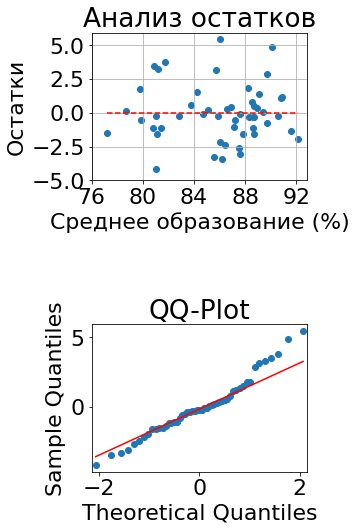

In [115]:
# получаем данные и вычисляем коэффициэнты регрессионной модели
data=pd.read_csv('states.csv', sep=',')
y1, x1 = "poverty", "hs_grad"
form = f"{y1} ~ {x1}"
intercept, slope = sm.ols(formula=form, data=data).fit().params
X = data['hs_grad']
Y = data['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='q', ax=ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)

In [110]:
y = 'white'
x = 'female_house'
"{0} ~ {1}".format(y, x) == 'white ~ female_house'

True

statsmodels:                              OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.11e-10
Time:                        22:40:58   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      

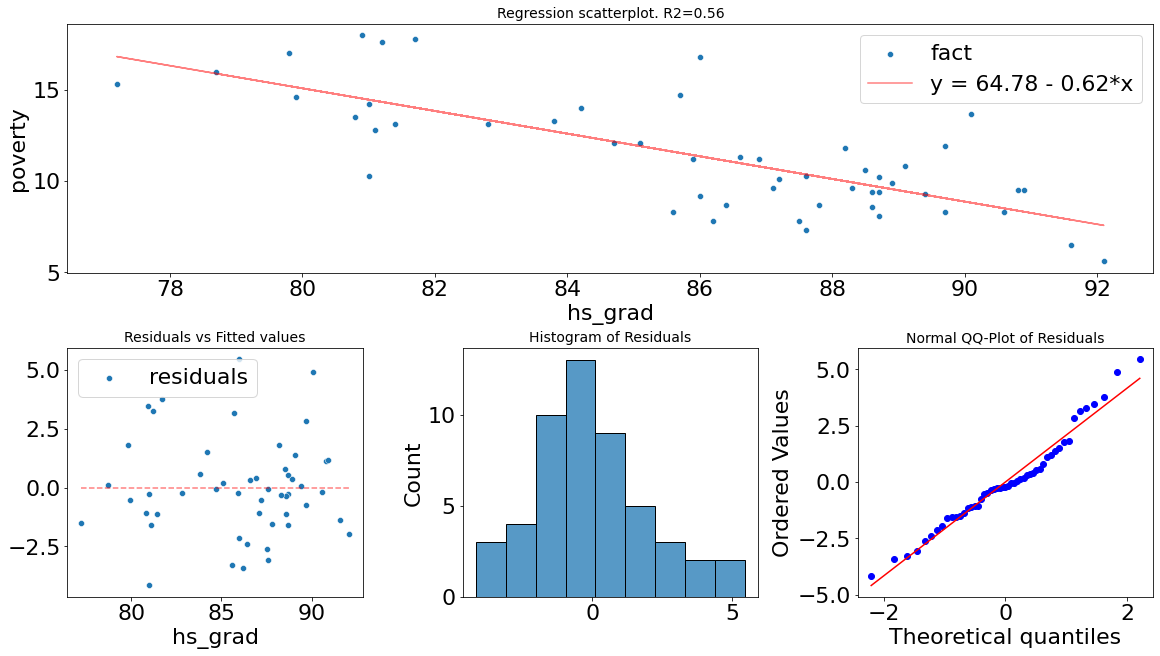

In [124]:
def calc_ols_statmodels(x, y, data):
#     x_for_ols = sm.add_constant(x)
    model = sm.ols(formula=f"{y} ~ {x}", data=data)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=data[x], y=data[y], ax=ax_main, label="fact")
    ax_main.plot(data[x], results.predict(), color='red', alpha=0.5, label=formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=data[x], y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, data[x].min(), data[x].max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

# ==================================================    
# пример вызова процедуры
calc_ols_statmodels("hs_grad", "poverty", states) 
# calc_ols_statmodels("female_house", "white", states)  

In [29]:
indp = ['white', 'hs_grad'
dep = ['poverty' ]

In [30]:
X = states[indp].values.reshape(-1, 2)
Y = states[dep].values.reshape(-1, 1)

lr = LR()
lr.fit(X, Y)
slope, bias = lr.coef_[0], lr.intercept_[0]

X1 = np.linspace(states[indp[0]].min(), states[indp[0]].max())
Y1 = np.linspace(states[indp[1]].min(), states[indp[1]].max())
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = bias + X1*slope[0] + Y1*slope[1]


In [31]:
slope, bias

(array([ 0.00229209, -0.89473988]), 95.97887603174945)

<IPython.core.display.Javascript object>


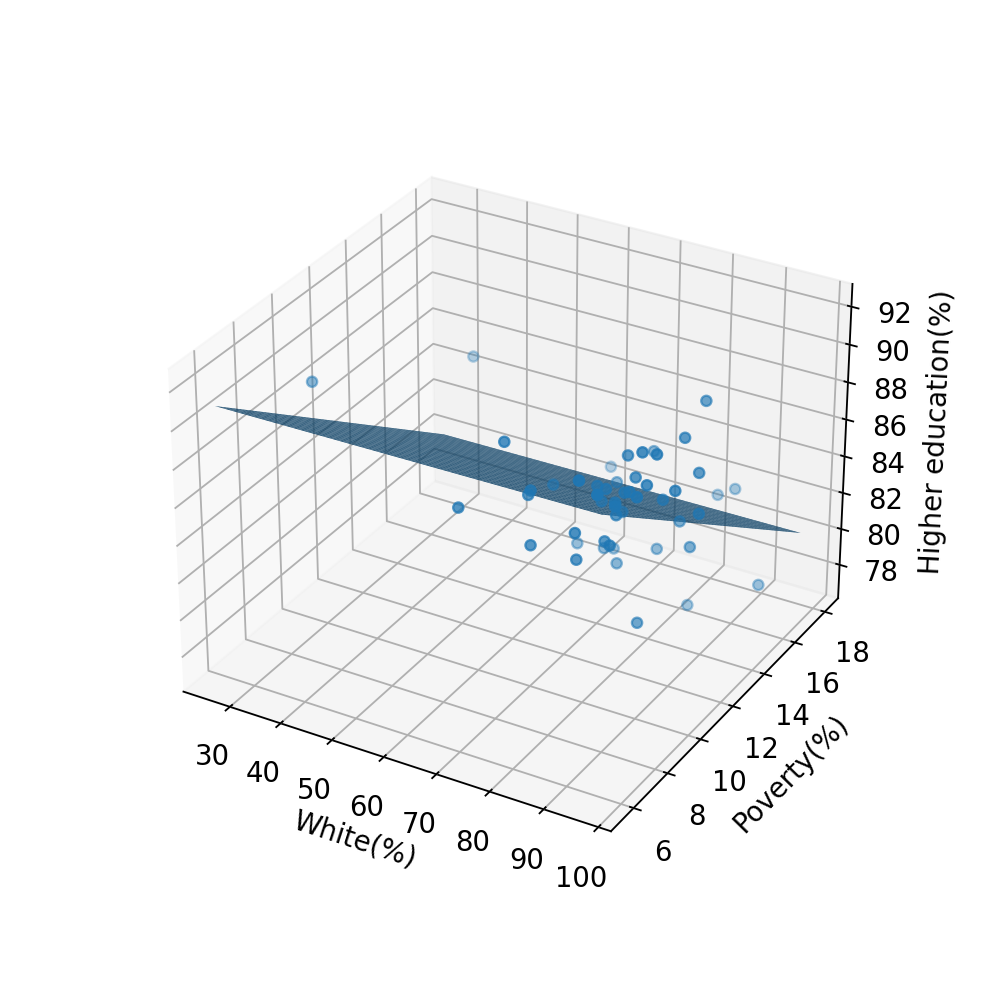

Text(0.5, 0, 'Higher education(%)')

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=states['white'], ys=states['poverty'], zs=states['hs_grad'])
# Plot the surface.
ax.plot_surface(X1, Y1, Z1)


ax.set_xlabel('White(%)')
ax.set_ylabel('Poverty(%)')
ax.set_zlabel('Higher education(%)')

In [34]:
result = sm.ols(formula="poverty ~ metro_res + white + hs_grad + female_house", data=states).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           8.88e-10
Time:                        21:05:23   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

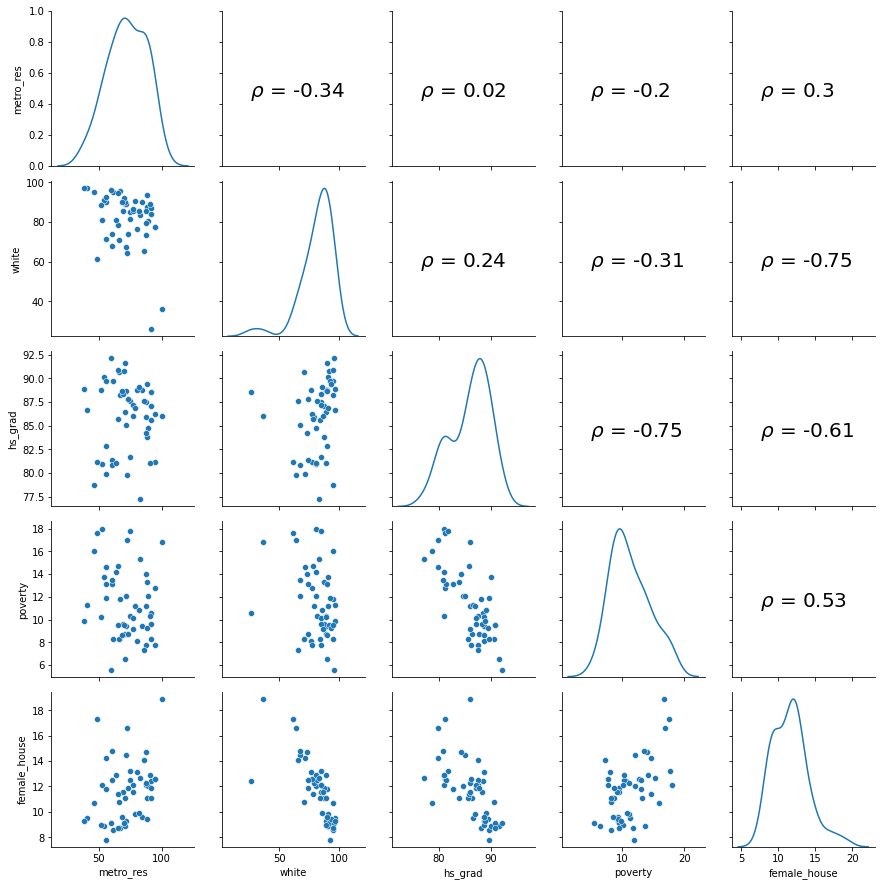

In [3]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(states, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
